In [18]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

## EX 1

In [19]:
F = 'Jan'
L = "Szałek"
N = (len(L)+len(F))*100

In [20]:
model_1=CmdStanModel(stan_file='code_1.stan')
sim_1=model_1.sample(data={'N': N}, 
                     iter_sampling=1, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=1,
                     fixed_param=True,
                     seed=29042020)
df1 = sim_1.draws_pd()

model_2=CmdStanModel(stan_file='code_2.stan')
sim_2=model_2.sample(data={'N': N}, 
                     iter_sampling=1, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=1,
                     fixed_param=True,
                     seed=29042020)
df2 = sim_2.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


## EX 2

In [21]:
model_3=CmdStanModel(stan_file='code_3.stan')
sim_3 = model_3.sample(data={'N': N, 'y': df1.iloc[0, 3:] })
df3 = sim_3.draws_pd()

model_4=CmdStanModel(stan_file='code_4.stan')
sim_4 = model_4.sample(data={'N': N, 'y': df1.iloc[0, 3:] })
df4 = sim_4.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [31]:
compare_loo = az.compare({'model 3': sim_3, 'model 4': sim_4}, ic='loo')
compare_loo

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model 4,0,-1329.324423,4.498154,0.00000,1.0,32.994344,0.000000,False,log
model 3,1,-1631.312883,31.072142,301.98846,0.0,127.912049,105.499213,True,log


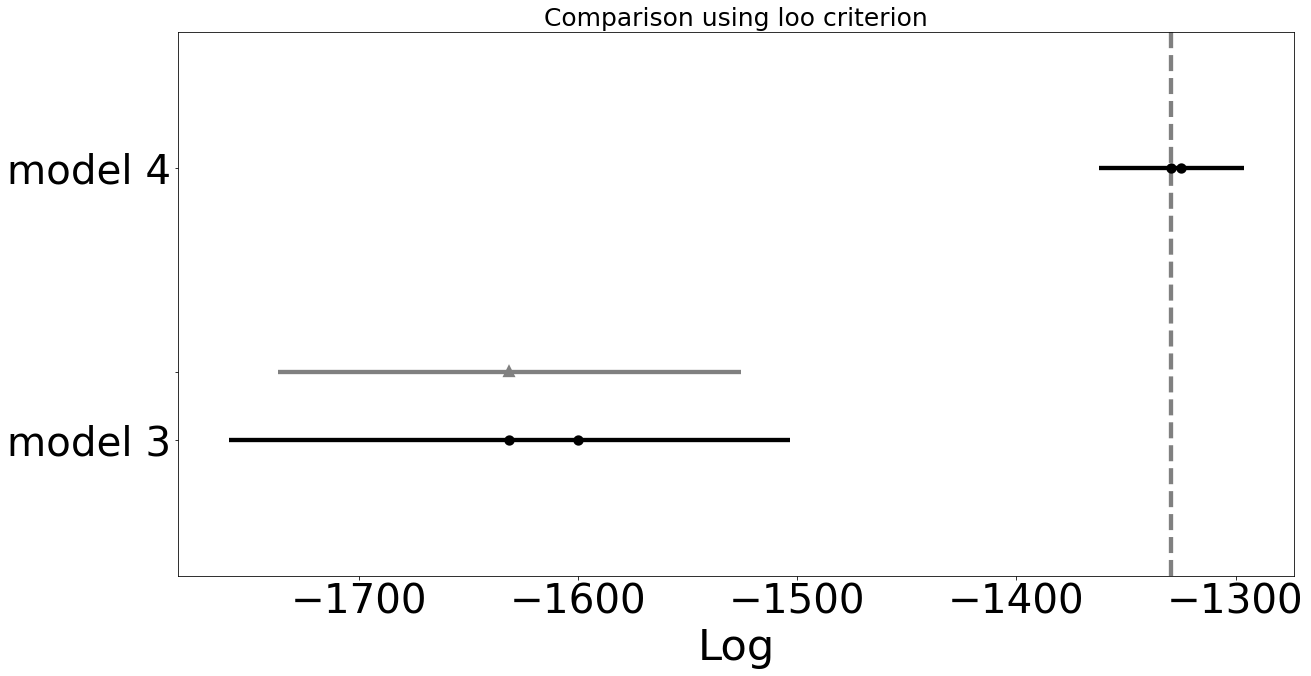

In [32]:
az.plot_compare(compare_loo, figsize=(20,10))
plt.title("Comparison using loo criterion", size = 25)
plt.show()

In [33]:
compare_waic = az.compare({'model 3': sim_3, 'model 4': sim_4}, ic='waic')
compare_waic

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model 4,0,-1329.315116,4.488847,0.000000,1.0,32.991056,0.000000,True,log
model 3,1,-1633.581483,33.340742,304.266367,0.0,129.190554,106.797392,True,log


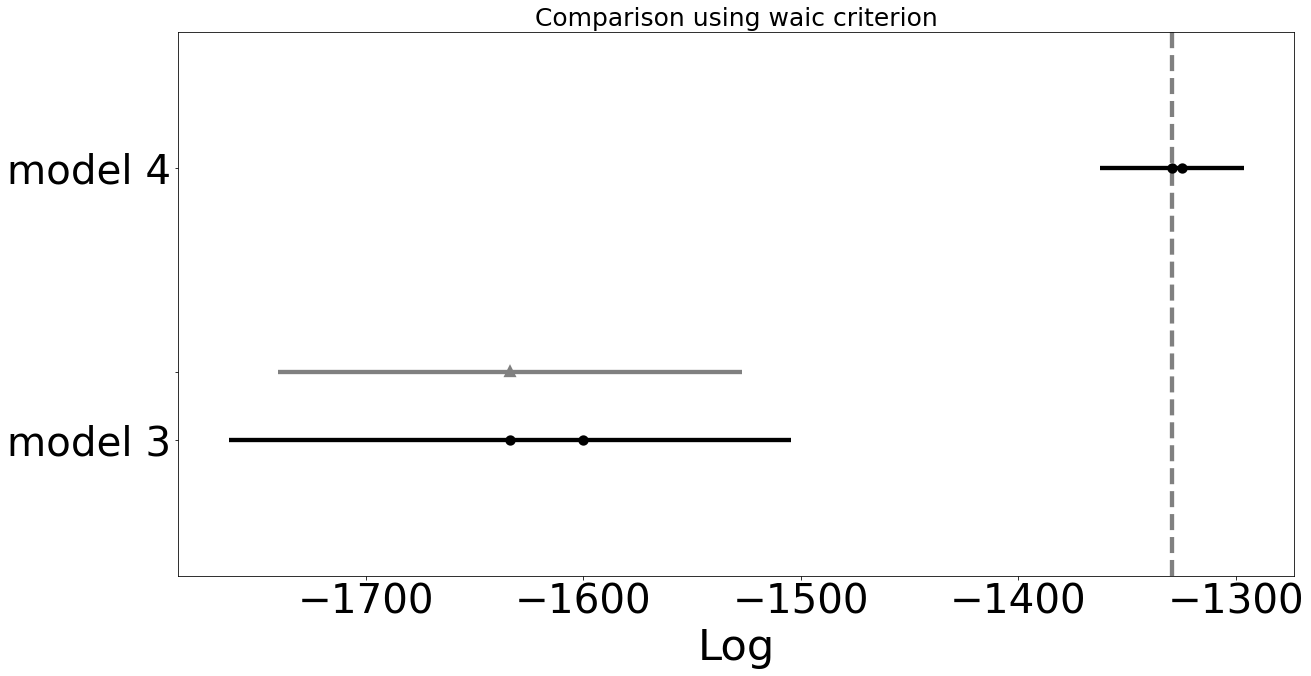

In [34]:
az.plot_compare(compare_waic, figsize=(20,10))
plt.title("Comparison using waic criterion", size=25)
plt.show()

## EX 3

In [40]:
model_5=CmdStanModel(stan_file='code_5.stan')
data1 = {'N': N, 'K': 1, 'y': df2.loc[:, 'y[1]':].values.reshape((N)), 'X': df2.loc[:, 'X[1,1]': f'X[{N},1]'].values.reshape((N, 1))}
data2 = {'N': N, 'K': 2, 'y': df2.loc[:, 'y[1]':].values.reshape((N)), 'X': df2.loc[:, 'X[1,1]': f'X[{N},2]'].values.reshape((N, 2))}
data3 = {'N': N, 'K': 3, 'y': df2.loc[:, 'y[1]':].values.reshape((N)), 'X': df2.loc[:, 'X[1,1]': f'X[{N},3]'].values.reshape((N, 3))}



INFO:cmdstanpy:found newer exe file, not recompiling


In [41]:
sim_5_1 = model_5.sample(data=data1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status




chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [42]:
sim_5_2 = model_5.sample(data=data2)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [43]:
sim_5_3 = model_5.sample(data=data3)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [45]:
compare_loo_5 = az.compare({'model 5_1': sim_5_1, 'model 5_2': sim_5_2, 'model 5_3': sim_5_3}, ic='loo')
compare_loo_5

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model 5_1,0,-1646.854241,2.121292,0.000000,1.000000e+00,20.609571,0.000000,False,log
model 5_2,1,-2101.096107,3.154957,454.241866,4.106104e-12,20.885023,24.046030,False,log
model 5_3,2,-2101.142455,4.104299,454.288214,2.309459e-09,21.072697,24.247764,False,log


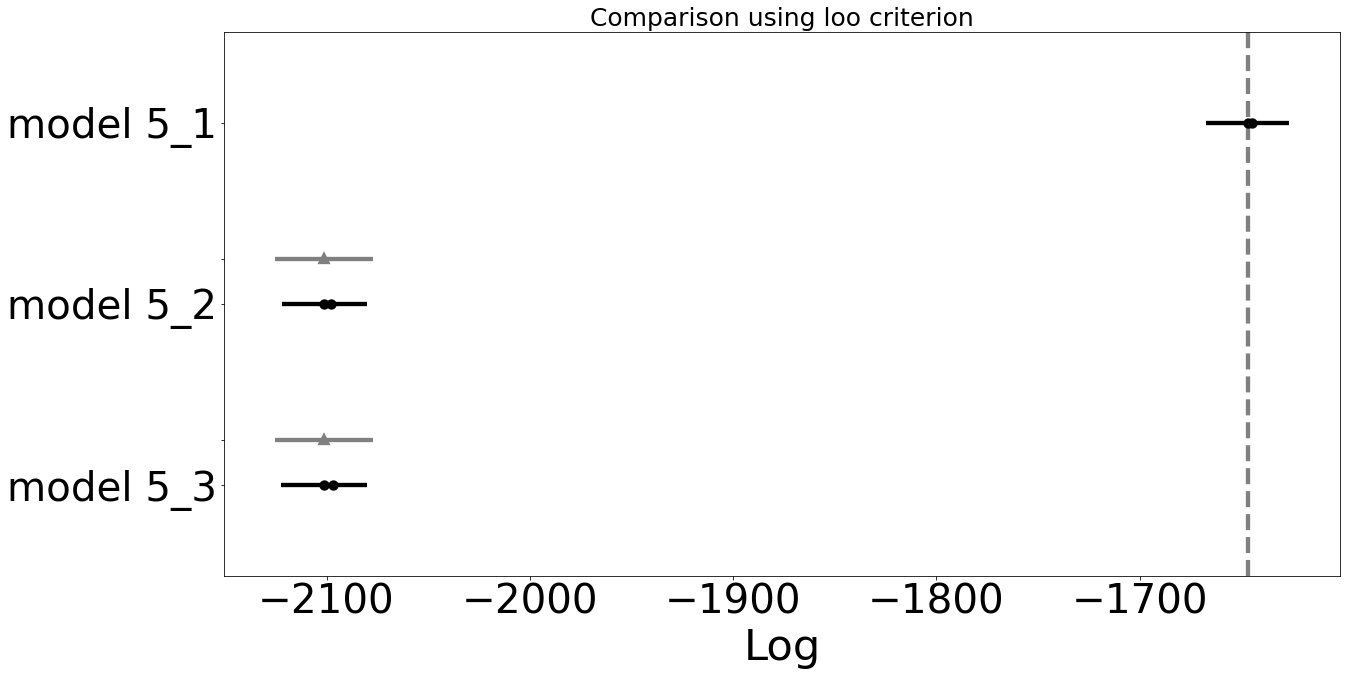

In [46]:
az.plot_compare(compare_loo_5, figsize=(20,10))
plt.title("Comparison using loo criterion", size = 25)
plt.show()

In [47]:
compare_waic_5 = az.compare({'model 5_1': sim_5_1, 'model 5_2': sim_5_2, 'model 5_3': sim_5_3}, ic='waic')
compare_waic_5

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model 5_1,0,-1646.854027,2.121078,0.000000,1.0,20.609552,0.000000,False,log
model 5_2,1,-2101.095412,3.154262,454.241385,0.0,20.884931,24.046000,False,log
model 5_3,2,-2101.142614,4.104457,454.288586,0.0,21.072717,24.247768,False,log


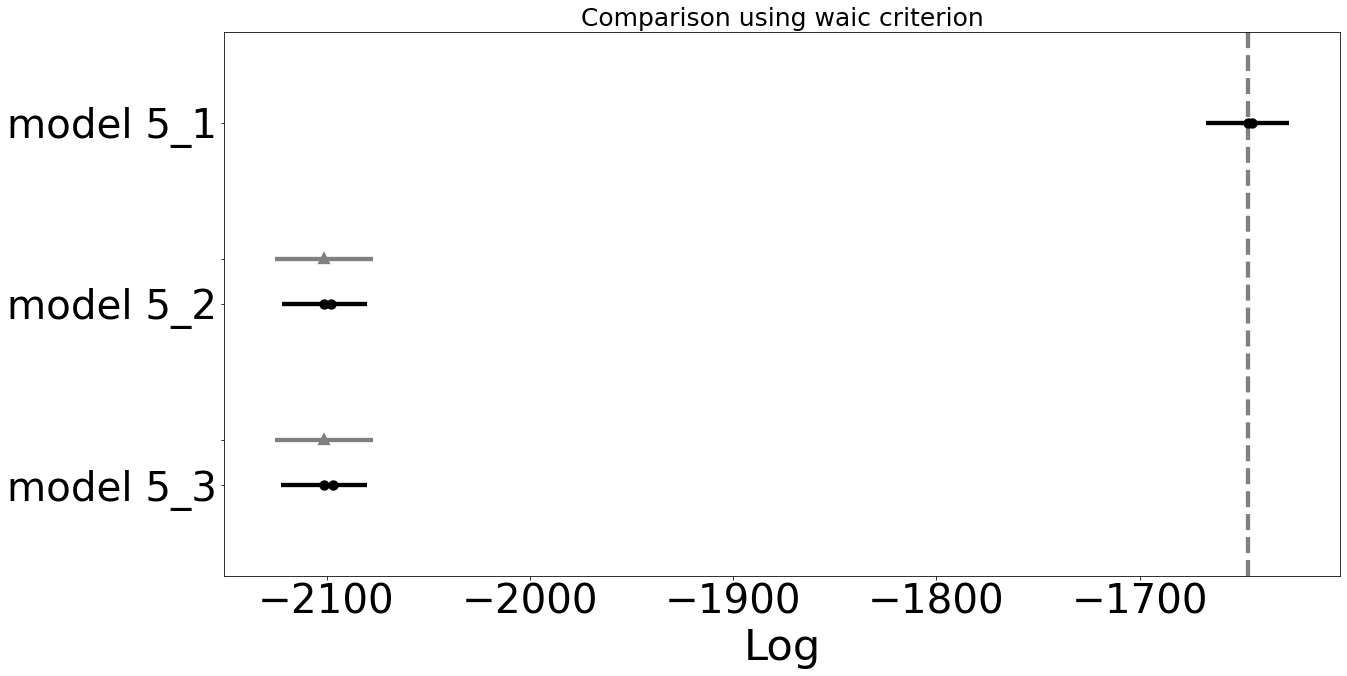

In [48]:
az.plot_compare(compare_waic_5, figsize=(20,10))
plt.title("Comparison using waic criterion", size=25)
plt.show()